# EDA 

In [3]:
!pip install seaborn matplotlib

In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [5]:
def get_data():
    
    current_dir = os.getcwd()
    sub_dir  = os.path.join(current_dir, 'data/stock_data')
    fileholder = os.listdir(sub_dir)
    df_dir = {}
    for file in fileholder:
        if file.endswith('.csv'):
            src=os.path.join(sub_dir, file)
            df = pd.read_csv(src)
            keyText = os.path.splitext(file)[0]
            keyPfirst = str(keyText.split('_')[0])
            keyPlast = (keyText.split('_')[-1])
            
            key = (f'{keyPfirst}_{keyPlast}')
            df_dir[key] = df
    return df_dir

In [6]:
df_dir = get_data()
stock_names = {'AAPL': 'Apple Inc.', 'GOOGL': 'Google (GOOGL)', 'GOOG': 'Google (GOOG)', 'AMZN':'Amazon', '^GSPC':'S&P 500', 'TSLA':'Tesla', '^FTSE': 'FTSE 100', '^FTMC': 'FTSE 250' }

In [7]:
def get_name(key):
    key = key.split('_')[0]
    return stock_names[key]

# Checking data values

In [8]:
df_dir['AAPL_daily'].columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [9]:
def get_shape(interval):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            print(f"Dataframe size for {company_name}:")
            print(df.shape)

In [10]:
def get_info(interval):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            print(f"Datatypes of {company_name}:")
            print(df.info())
            print('___________________________________________')

In [11]:
def mvalue_check(interval):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            print(f"Datatypes of {company_name}:")
            print(df.isna().sum())
            print('___________________________________________')


# Visual representations of data

In [26]:
def line_plot(interval, attr):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            df['Date'] = pd.to_datetime(df['Date'])
            df_sorted = df.sort_values(by='Date')
            company_name = get_name(key)
            plt.figure(figsize=(12, 6))
            plt.plot(df_sorted['Date'], df_sorted[attr], label=f'{company_name} {attr} Price', linewidth=2)
            plt.title(f'{company_name} {attr} price')
            plt.xlabel('Date')
            plt.ylabel('Close price')
            plt.legend()
            plt.savefig(f'{company_name}_lineplot.png')
            plt.show()

In [19]:
def company_chart(interval, exclusion):
    plt.figure(figsize=(10, 6))
    for key, df in df_dir.items():
        if key and key.endswith(interval)and not any(exclusion in key for exclusion in exclusions):
            company_name = get_name(key)
            df['Date'] = pd.to_datetime(df['Date'])
            df_sorted = df.sort_values(by='Date')
            sns.lineplot(x='Date', y='Adj Close', data=df_sorted, label=company_name)
            
    plt.title('Adj Close stock price comparison')
    plt.xlabel('Date')
    plt.ylabel('Closing Stock Price')
    plt.savefig(f'{company_name}_chart.png')
    
    plt.legend()
    plt.tight_layout()  
    plt.show()

In [14]:
def heatmap(interval):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            corr = df[['Open', 'High', 'Low', 'Close','Adj Close']].corr()
            plt.figure(figsize=(8,8))
            sns.heatmap(corr, annot=True, cmap='coolwarm')
            plt.title(f'Correlation attributes for {company_name}')
            plt.show()
            plt.savefig(f'{company_name}_plot.png')

# Daily stock data

In [15]:
interval= 'daily'

In [12]:
get_shape(interval)

Dataframe size for Apple Inc.:
(5033, 9)
Dataframe size for Google (GOOGL):
(4875, 9)
Dataframe size for Google (GOOG):
(4875, 9)
Dataframe size for Amazon:
(5033, 9)
Dataframe size for S&P 500:
(5033, 9)
Dataframe size for Tesla:
(3400, 9)
Dataframe size for FTSE 100:
(5050, 9)
Dataframe size for FTSE 250:
(5051, 9)


In [13]:
get_info(interval)

Datatypes of Apple Inc.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5033 non-null   object 
 1   Open          5033 non-null   float64
 2   High          5033 non-null   float64
 3   Low           5033 non-null   float64
 4   Close         5033 non-null   float64
 5   Adj Close     5033 non-null   float64
 6   Volume        5033 non-null   int64  
 7   Dividends     5033 non-null   float64
 8   Stock Splits  5033 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 354.0+ KB
None
___________________________________________
Datatypes of Google (GOOGL):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4875 non-null   object 
 1   Open          

In [14]:
mvalue_check(interval)

Datatypes of Apple Inc.:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of Google (GOOGL):
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of Google (GOOG):
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of Amazon:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of S&P 500:

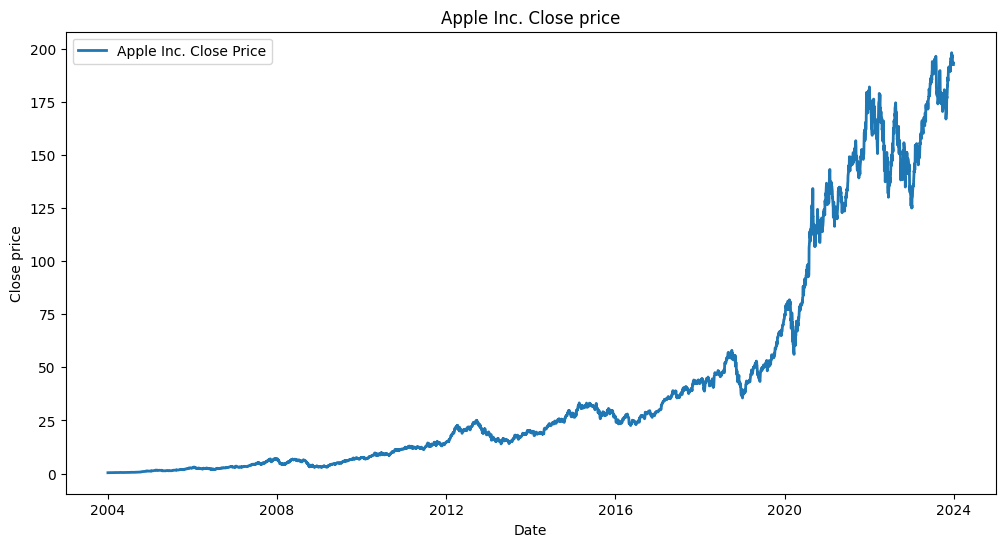

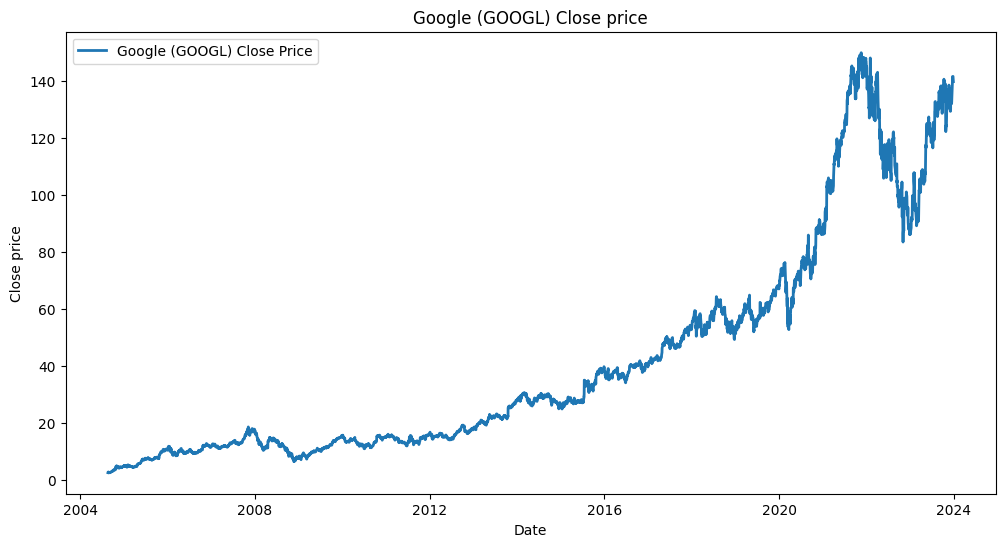

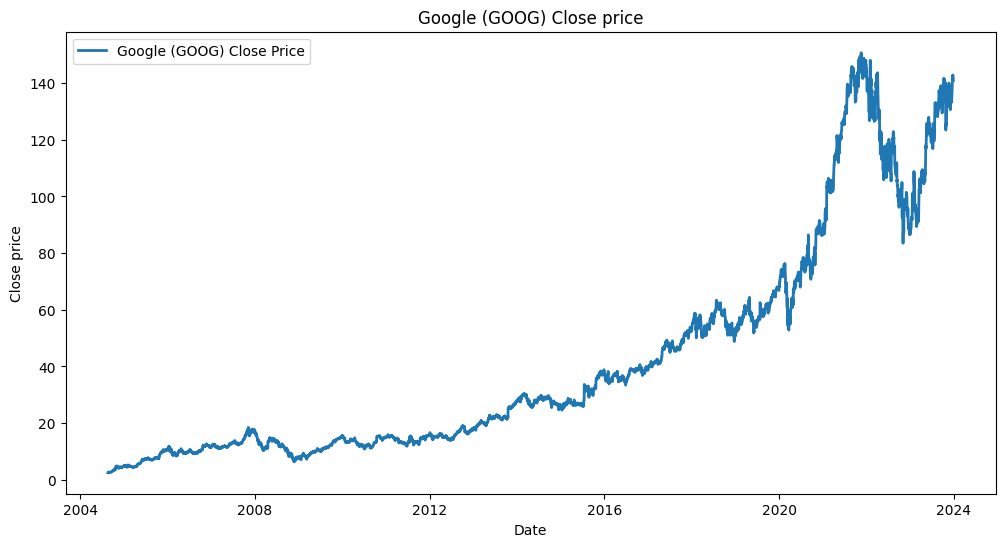

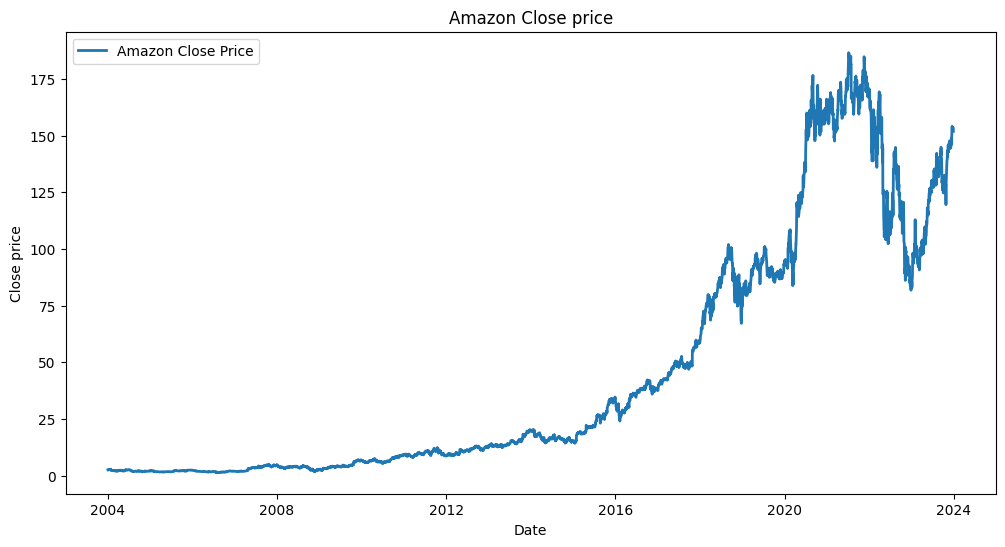

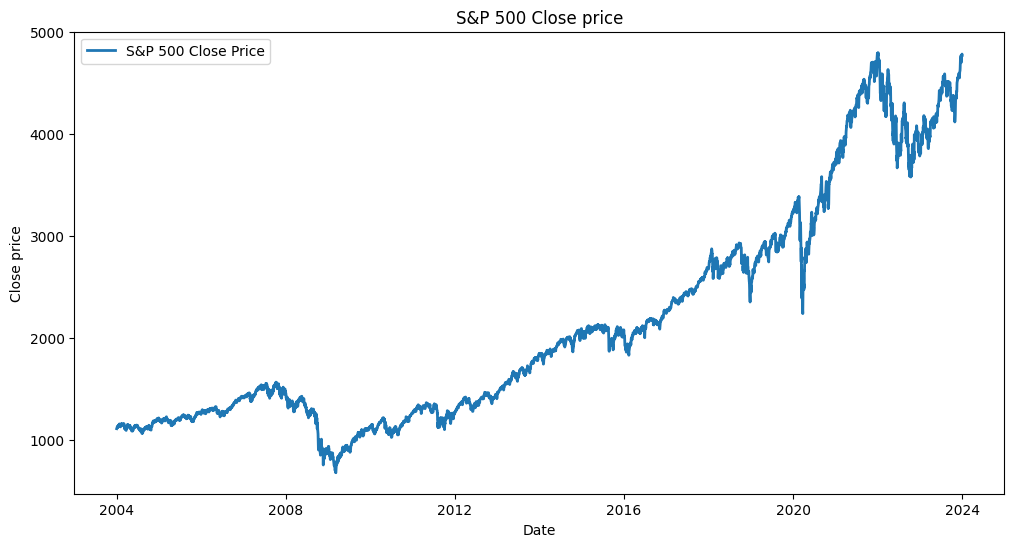

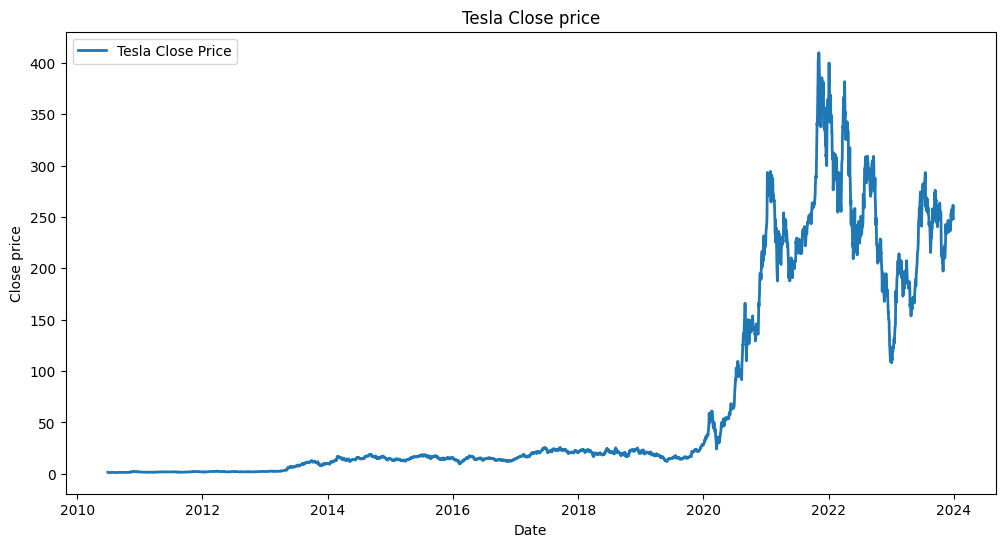

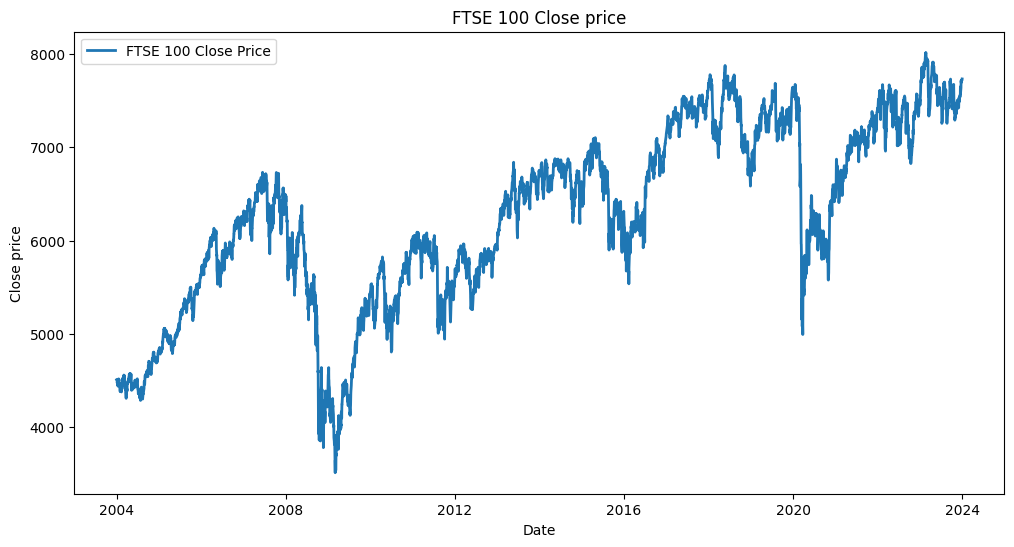

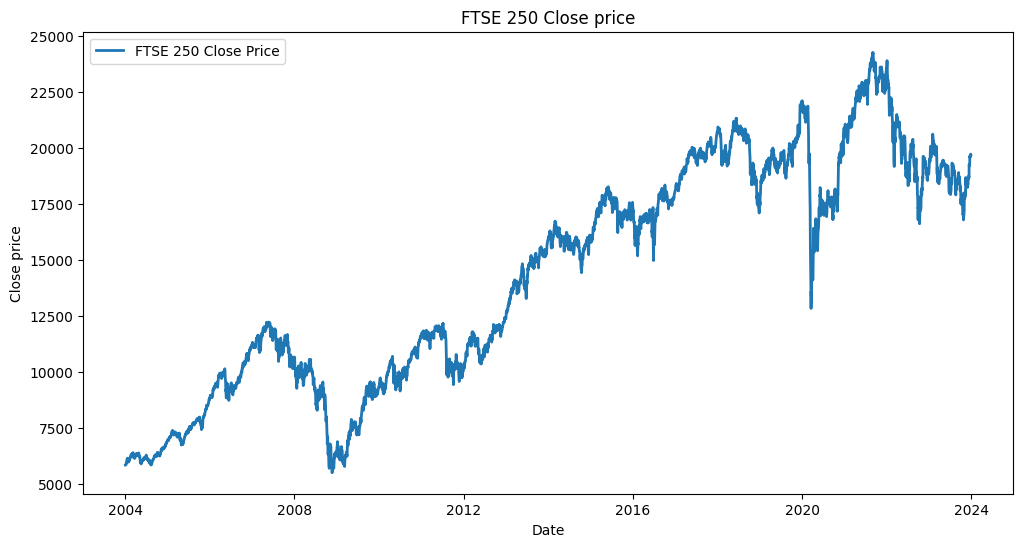

In [21]:
line_plot(interval, 'Close')

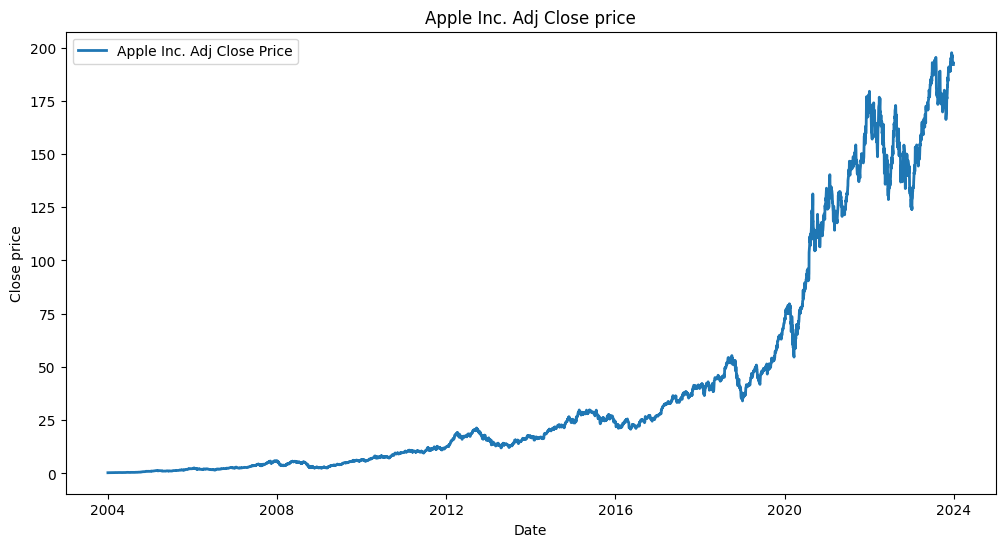

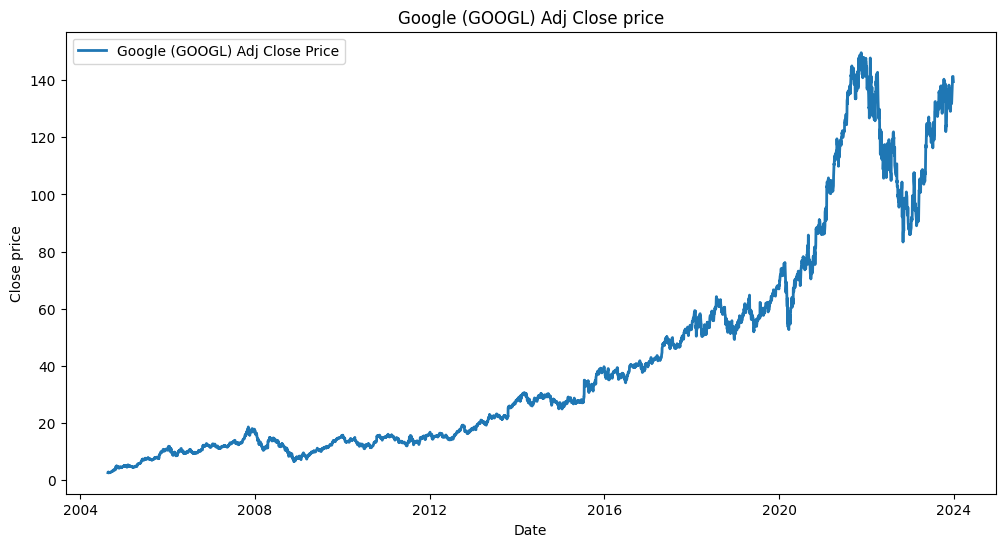

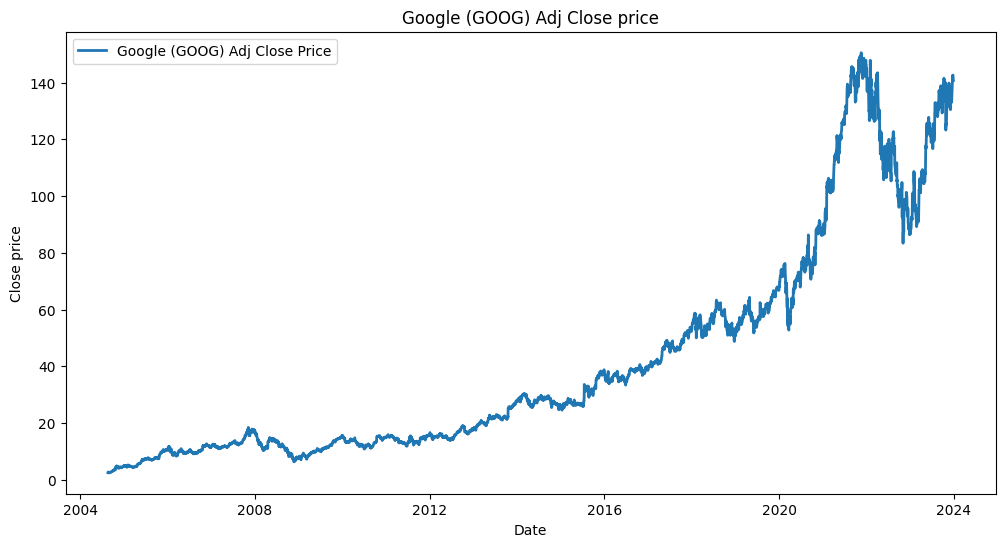

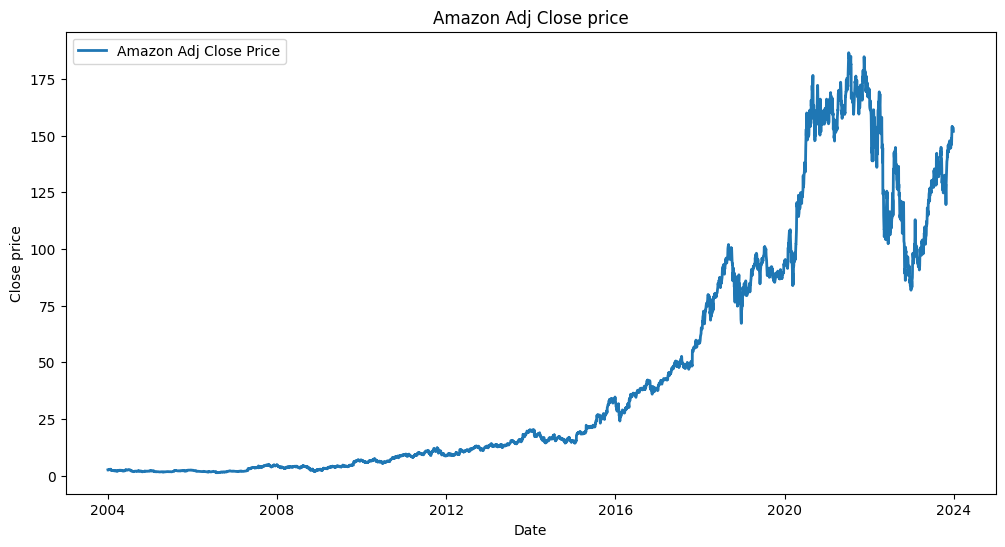

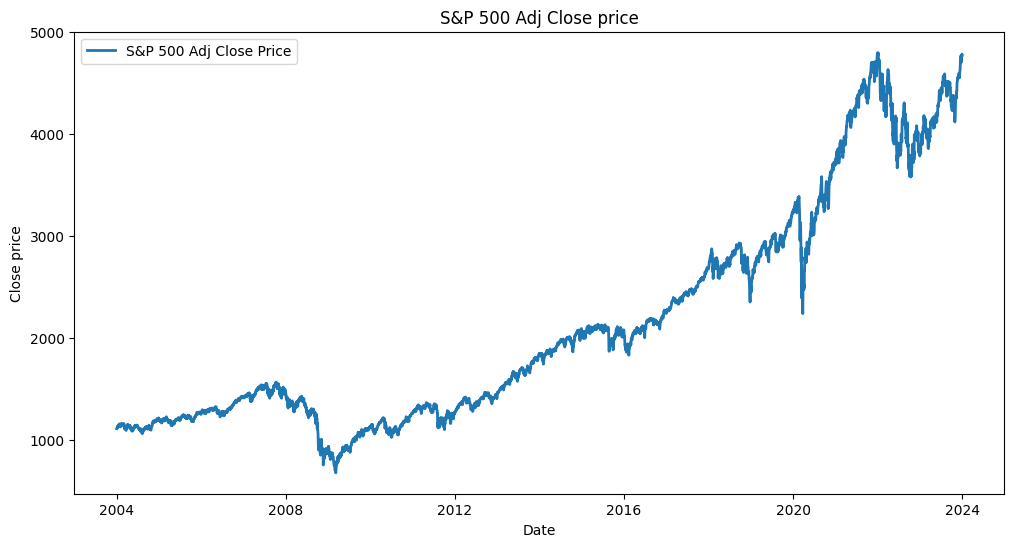

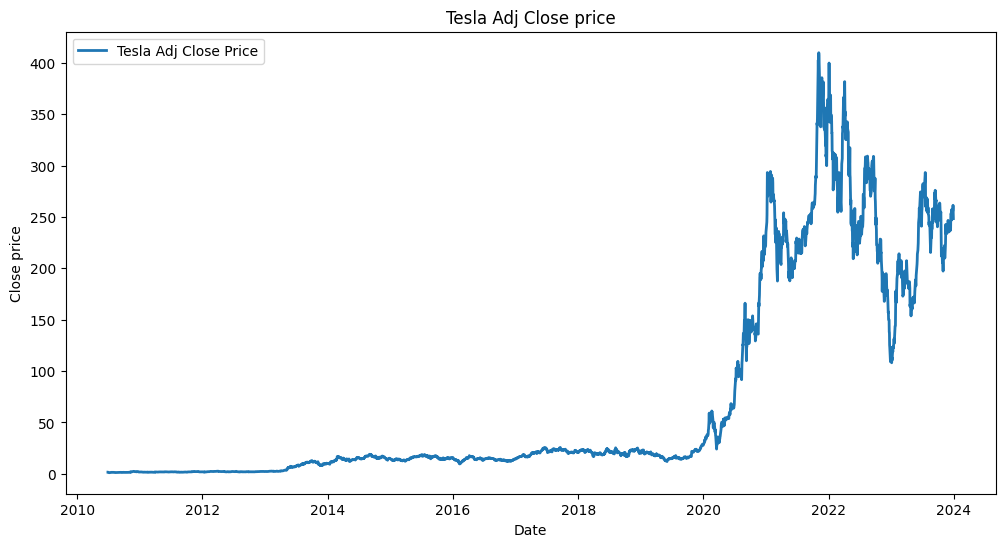

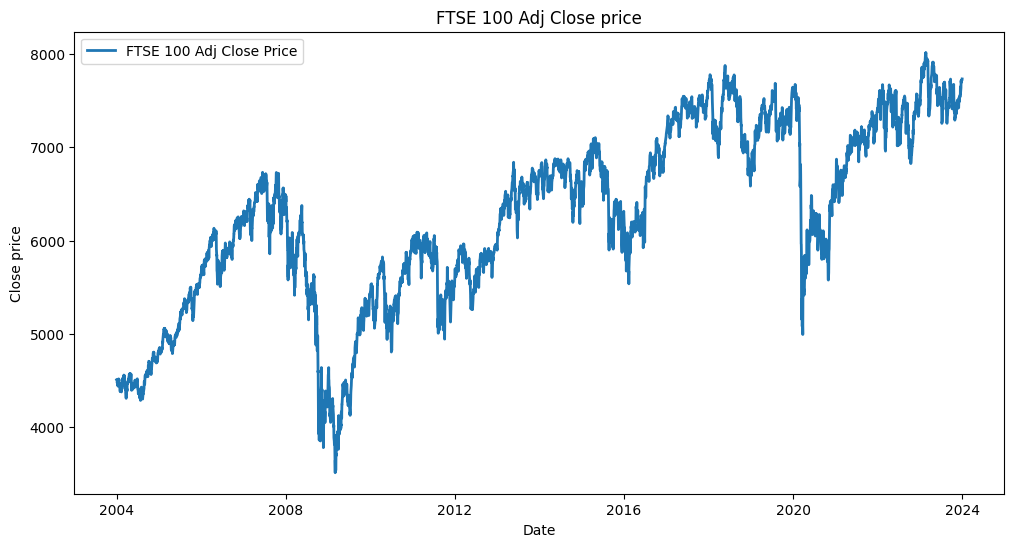

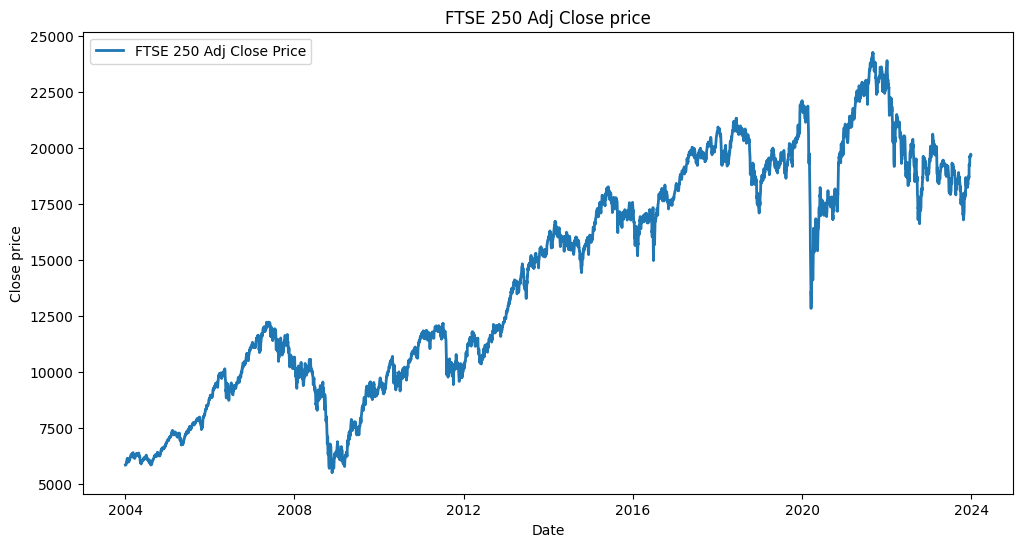

In [22]:
line_plot(interval, 'Adj Close')

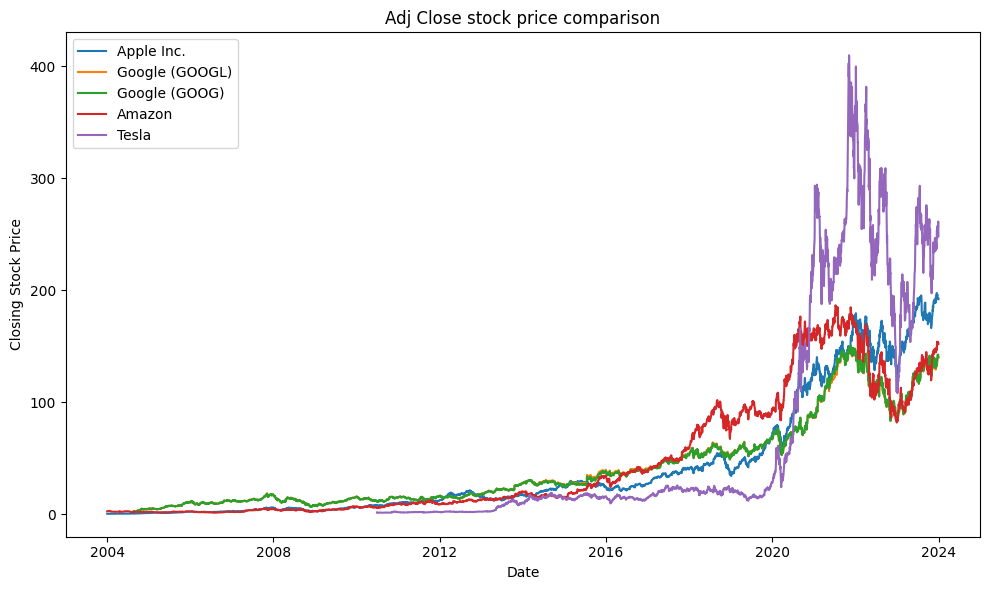

In [23]:
exclusions = ['^GSPC', 'FTSE', '^FTMC']
company_chart(interval, exclusions)

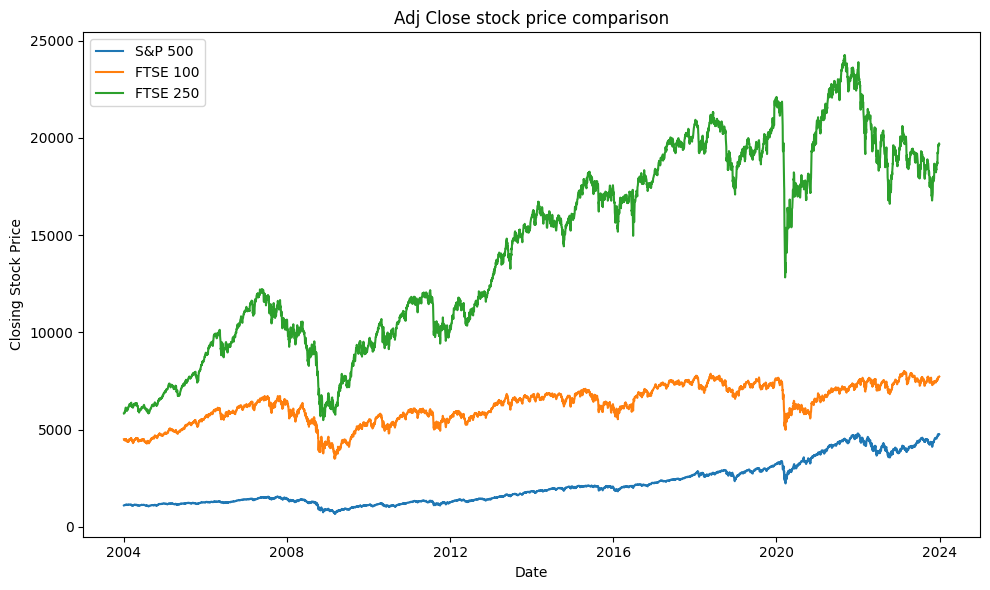

In [21]:
exclusions = ['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG']
company_chart(interval, exclusions)

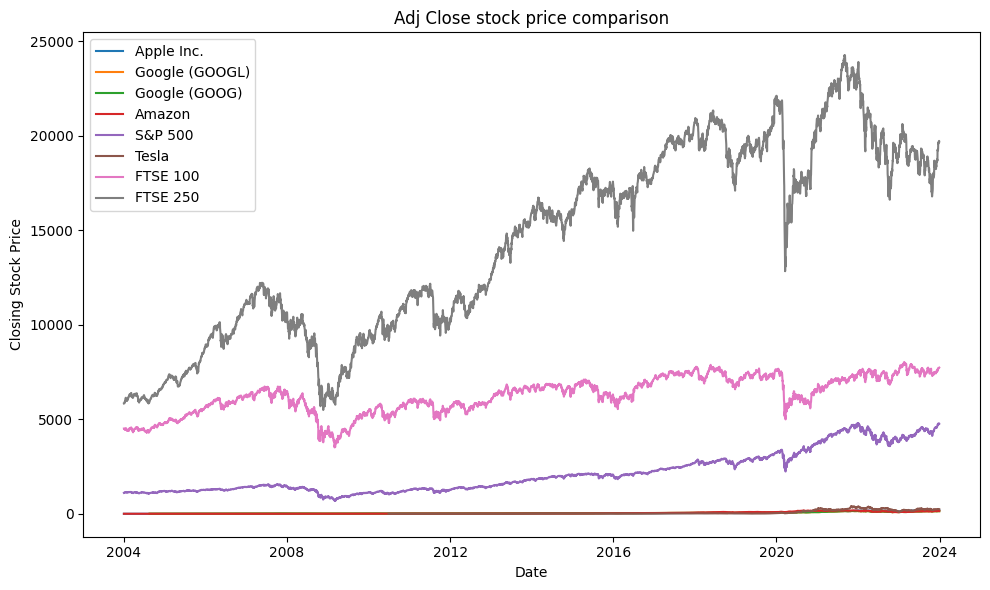

In [23]:
exclusions = ['no']
company_chart(interval, exclusions)

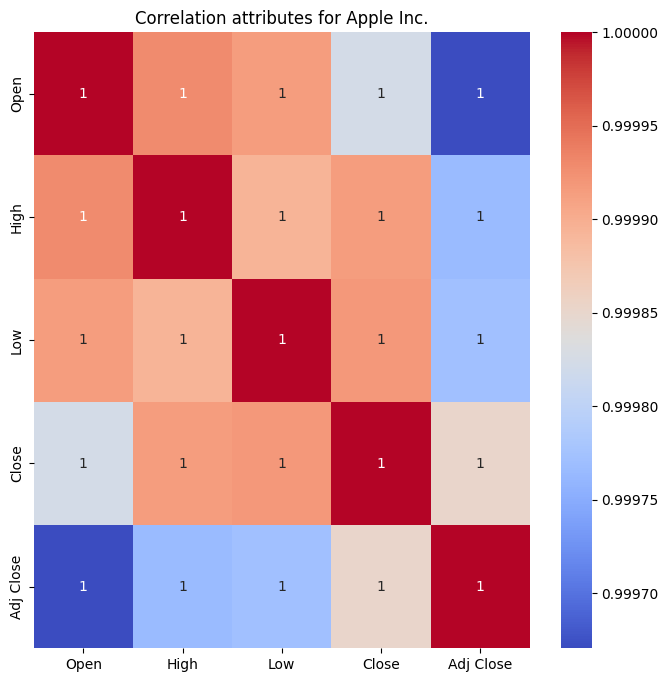

<Figure size 640x480 with 0 Axes>

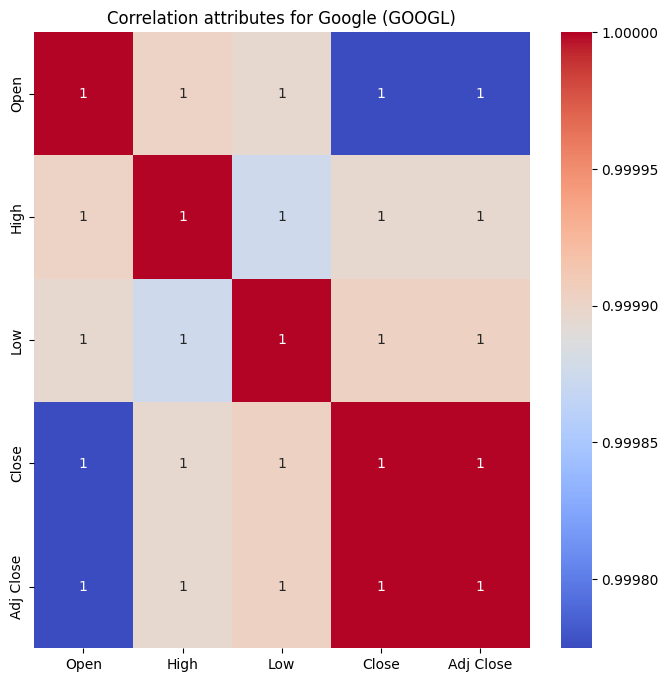

<Figure size 640x480 with 0 Axes>

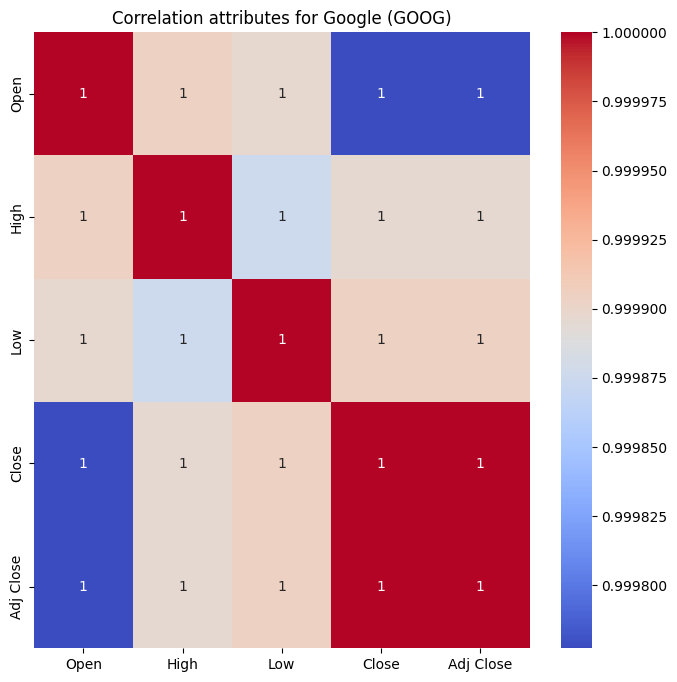

<Figure size 640x480 with 0 Axes>

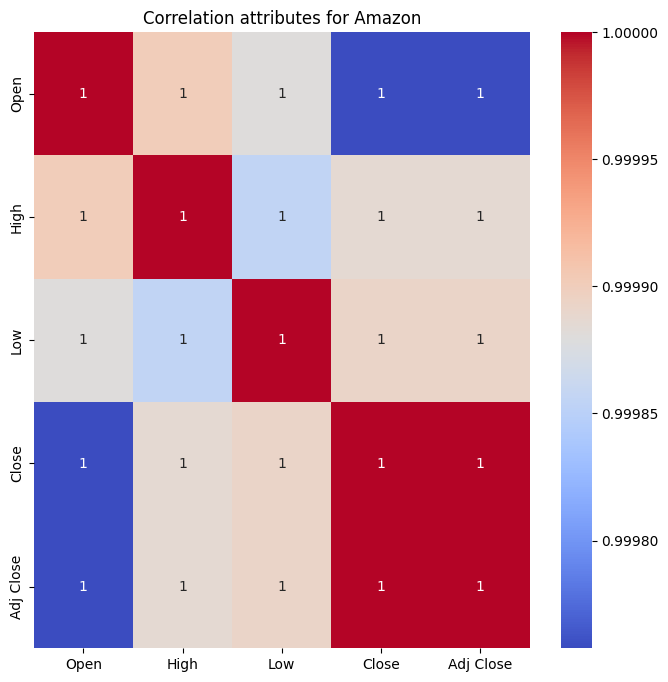

<Figure size 640x480 with 0 Axes>

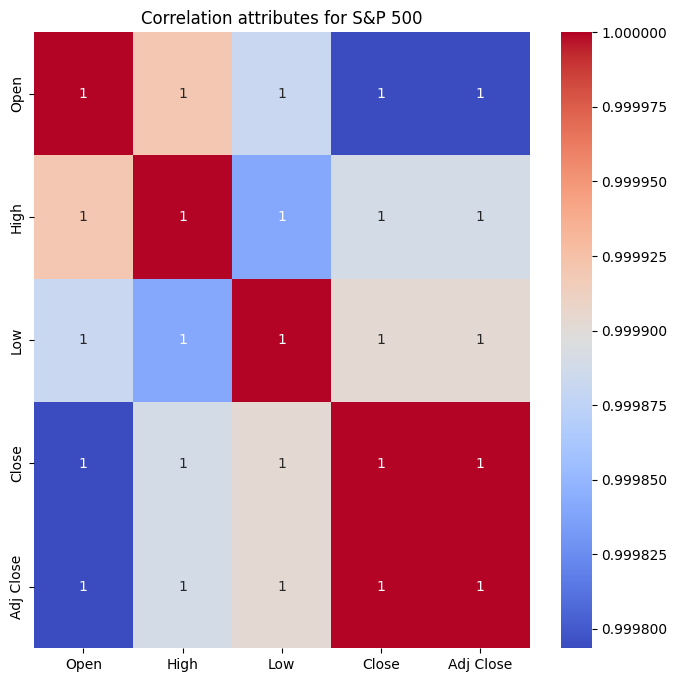

<Figure size 640x480 with 0 Axes>

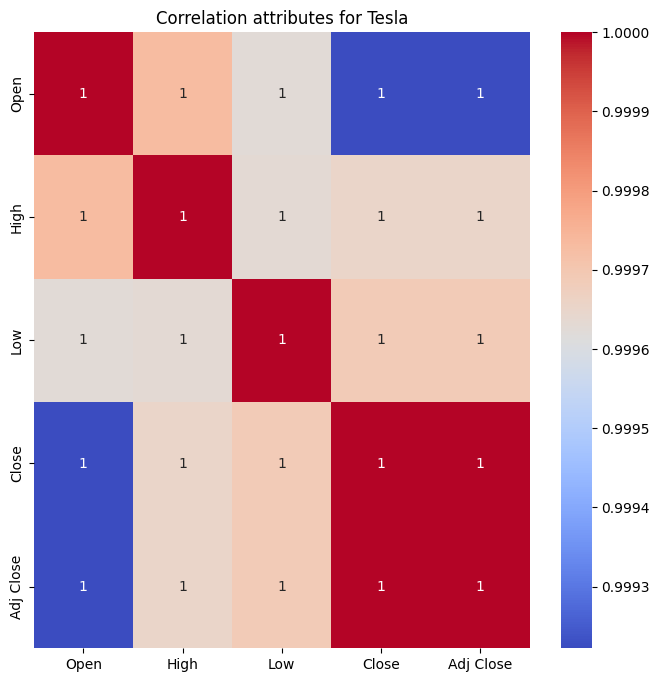

<Figure size 640x480 with 0 Axes>

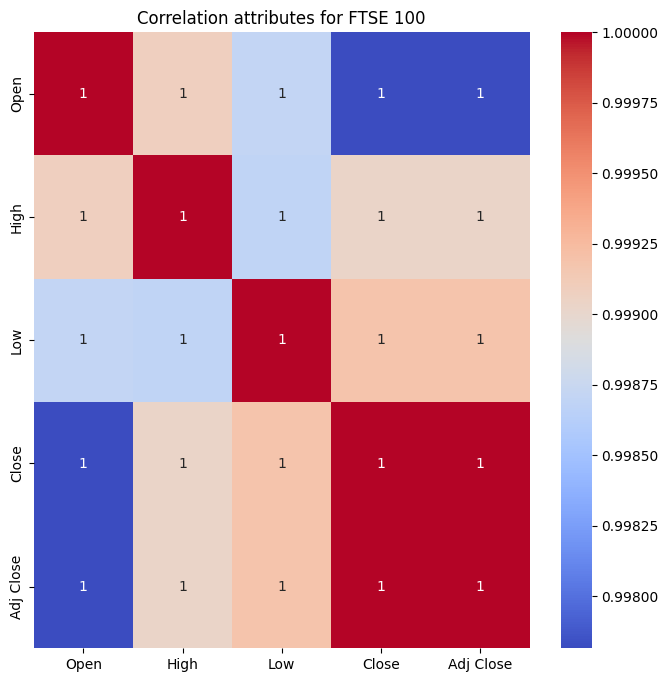

<Figure size 640x480 with 0 Axes>

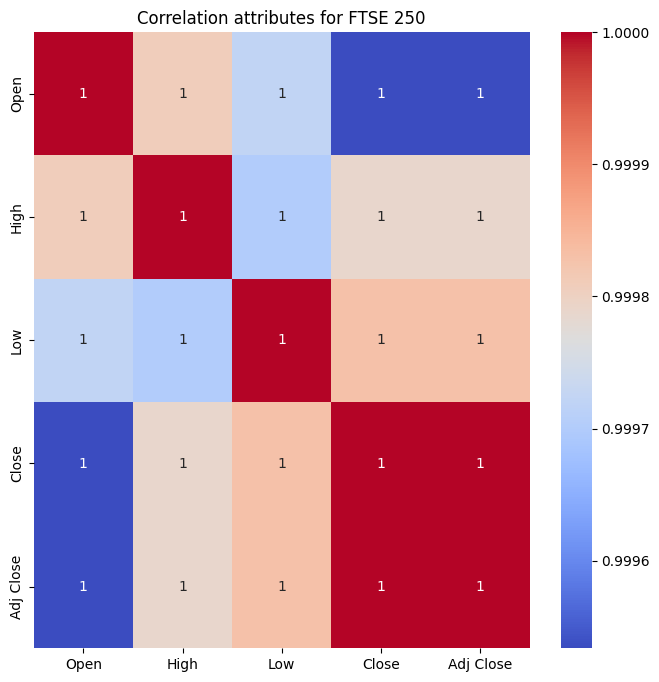

<Figure size 640x480 with 0 Axes>

In [16]:
heatmap(interval)

# Monthly Stock Data

In [24]:
interval = 'monthly'

In [20]:
get_shape(interval)

Dataframe size for S&P 500:
(240, 9)
Dataframe size for FTSE 100:
(240, 9)
Dataframe size for FTSE 250:
(240, 9)
Dataframe size for Tesla:
(162, 9)
Dataframe size for Apple Inc.:
(240, 9)
Dataframe size for Google (GOOGL):
(232, 9)
Dataframe size for Google (GOOG):
(232, 9)
Dataframe size for Amazon:
(240, 9)


In [17]:
get_info(interval)

Datatypes of S&P 500:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          240 non-null    object 
 1   Open          240 non-null    float64
 2   High          240 non-null    float64
 3   Low           240 non-null    float64
 4   Close         240 non-null    float64
 5   Adj Close     240 non-null    float64
 6   Volume        240 non-null    int64  
 7   Dividends     240 non-null    float64
 8   Stock Splits  240 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 17.0+ KB
None
___________________________________________
Datatypes of FTSE 100:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          240 non-null    object 
 1   Open          240 non-null  

In [27]:
mvalue_check(interval)

Datatypes of S&P 500:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of FTSE 100:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of FTSE 250:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of Tesla:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
___________________________________________
Datatypes of Apple Inc.:
Date       

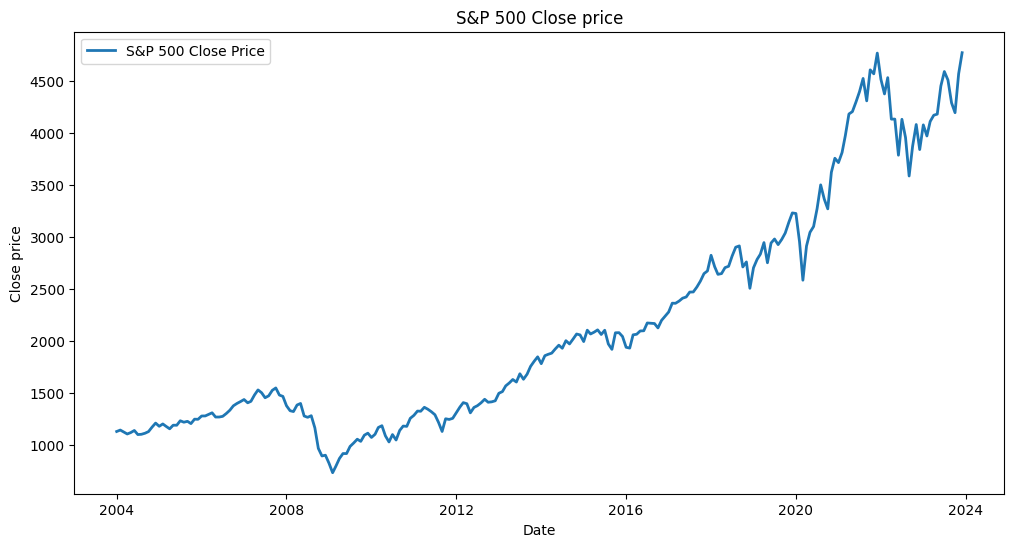

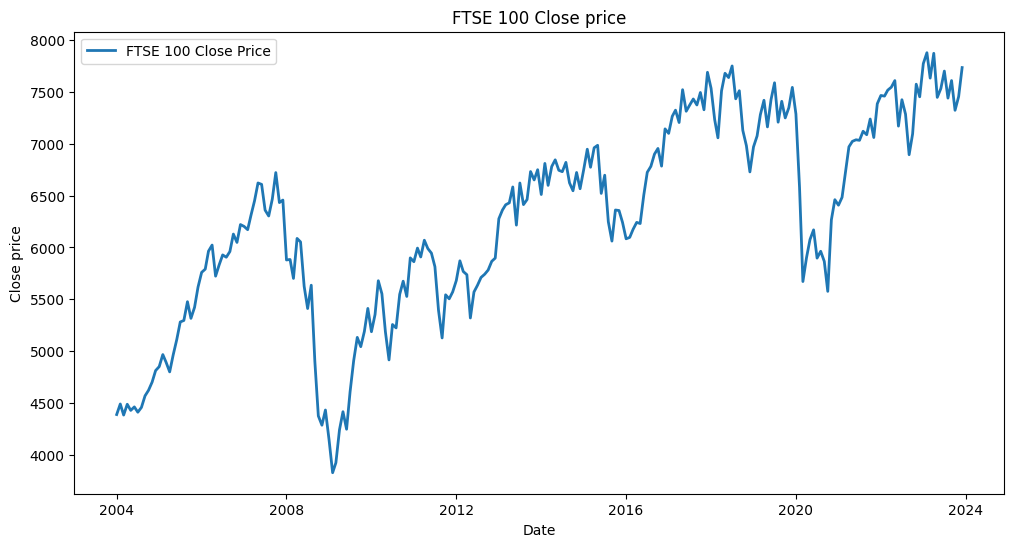

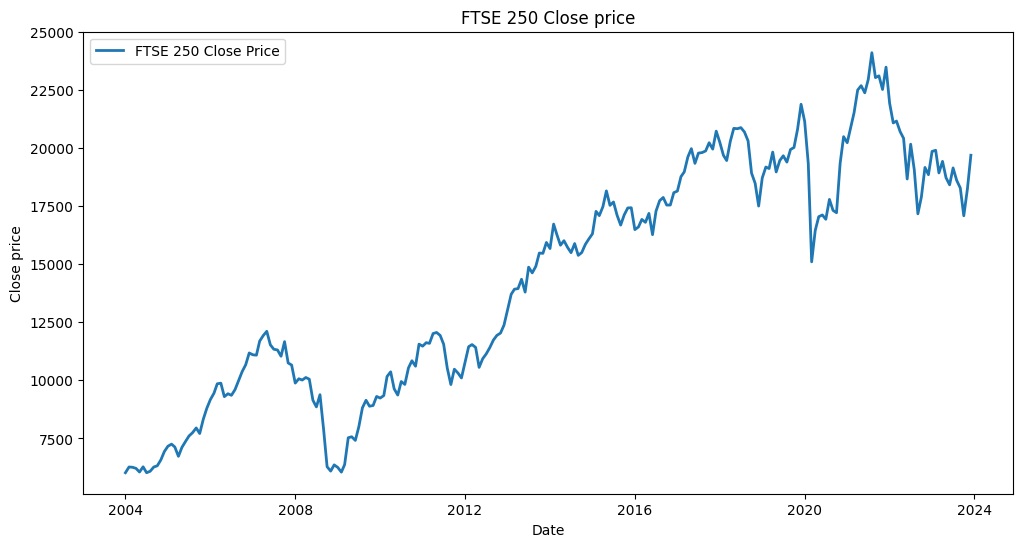

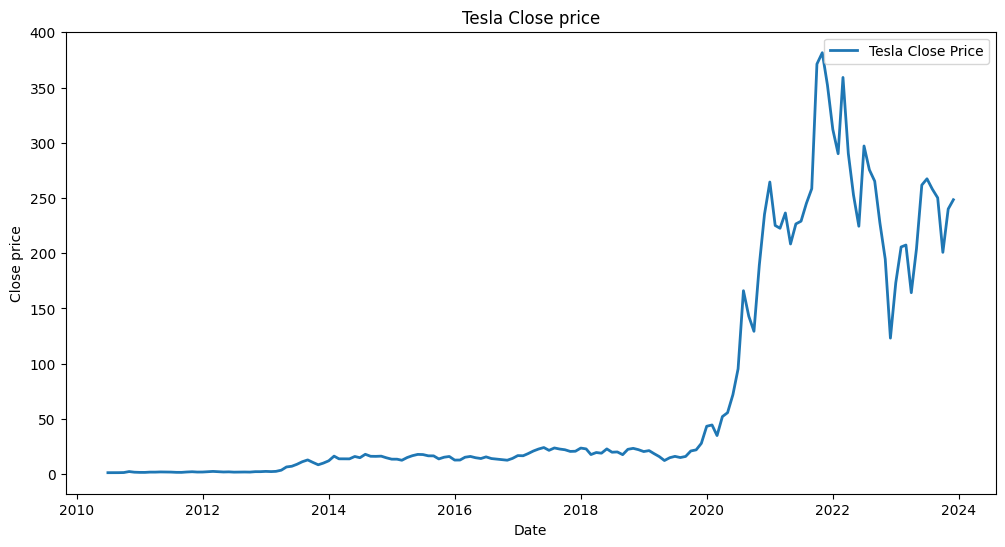

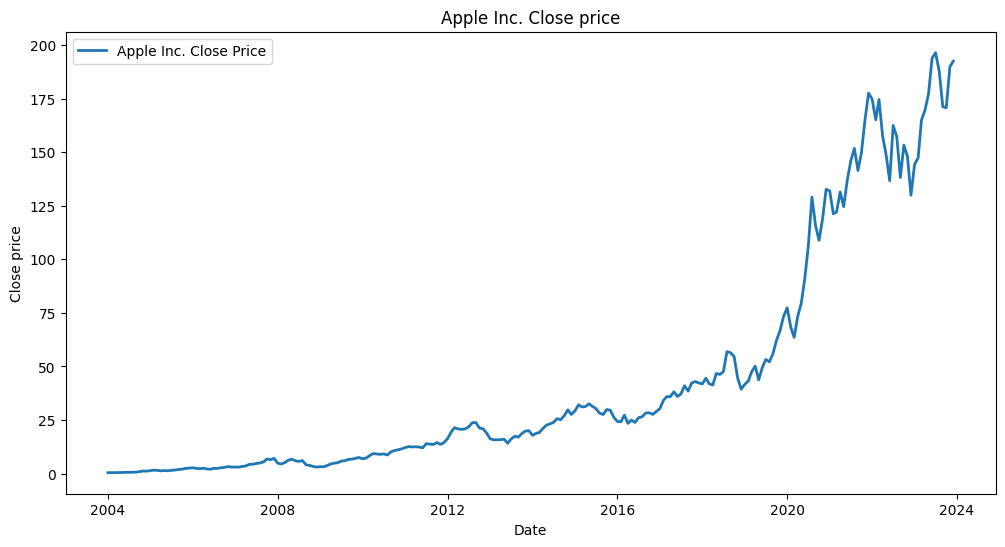

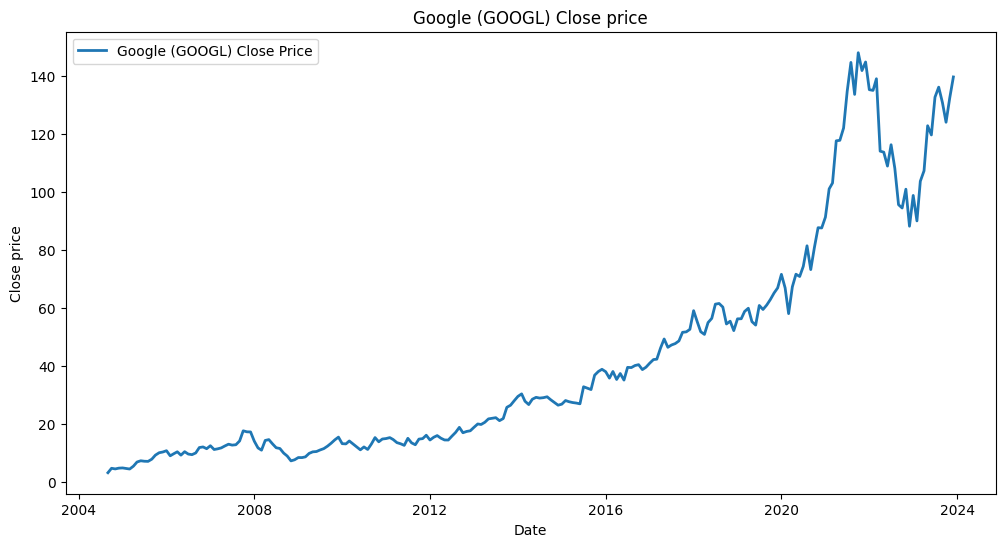

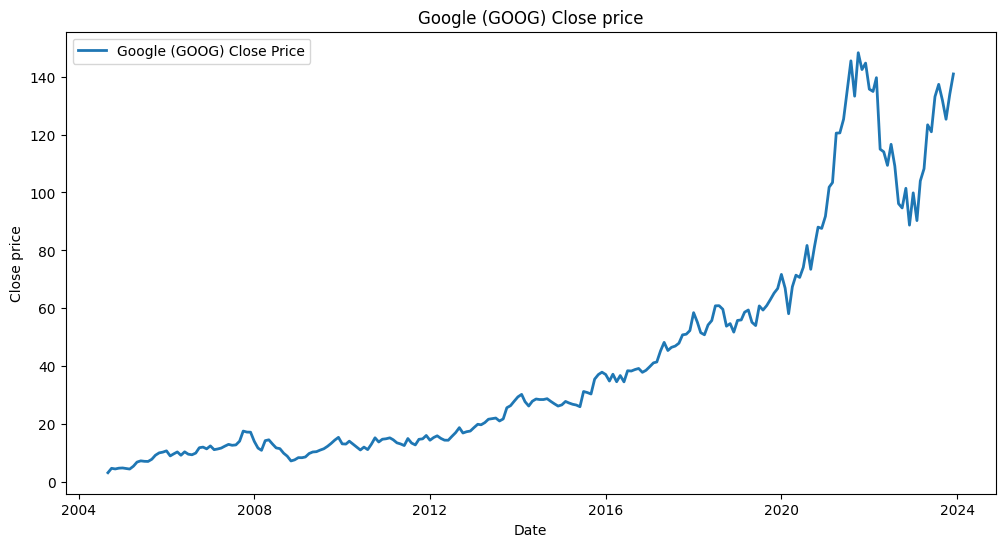

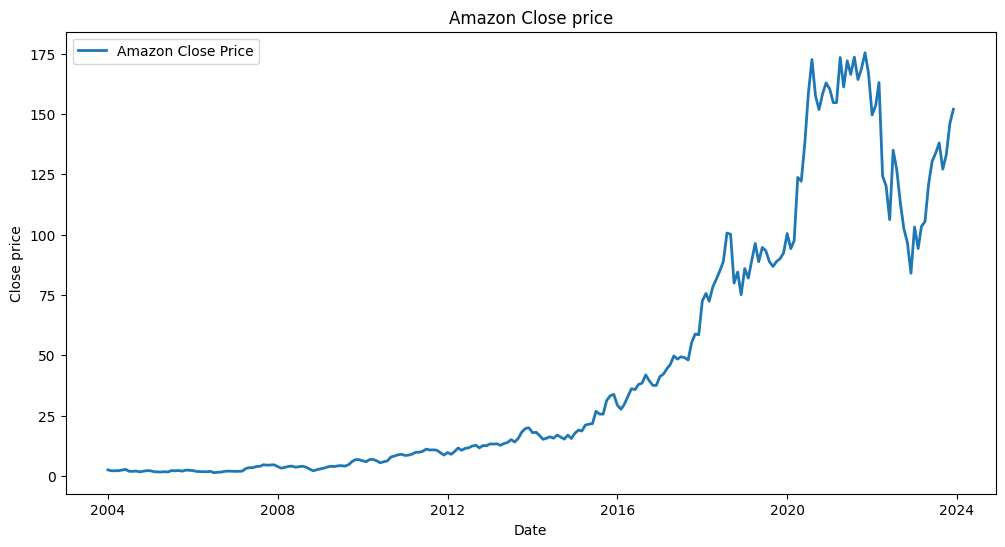

In [27]:
line_plot(interval, 'Close')

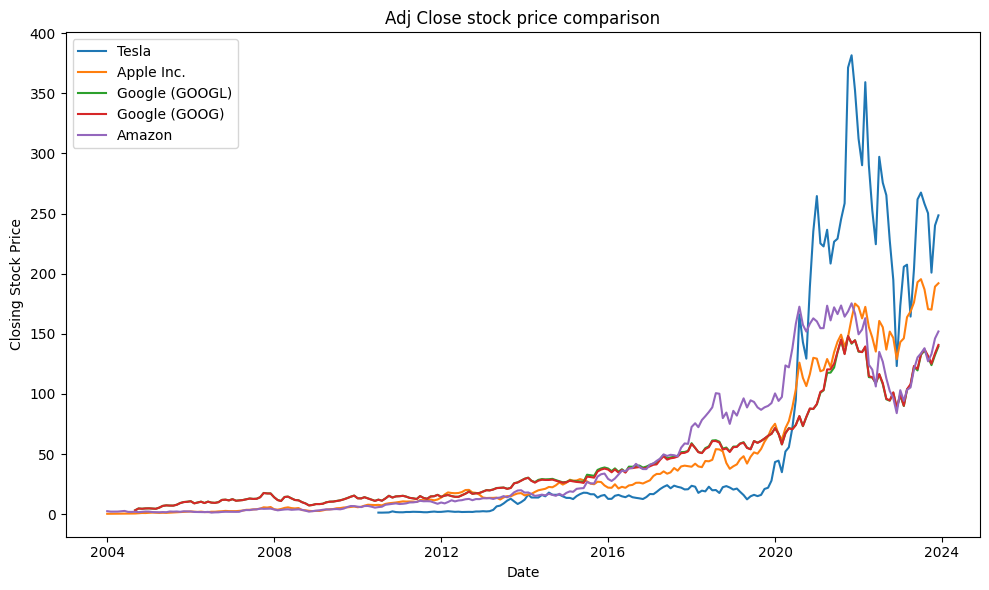

In [28]:
exclusions = ['^GSPC', 'FTSE', '^FTMC']
company_chart(interval, exclusions)

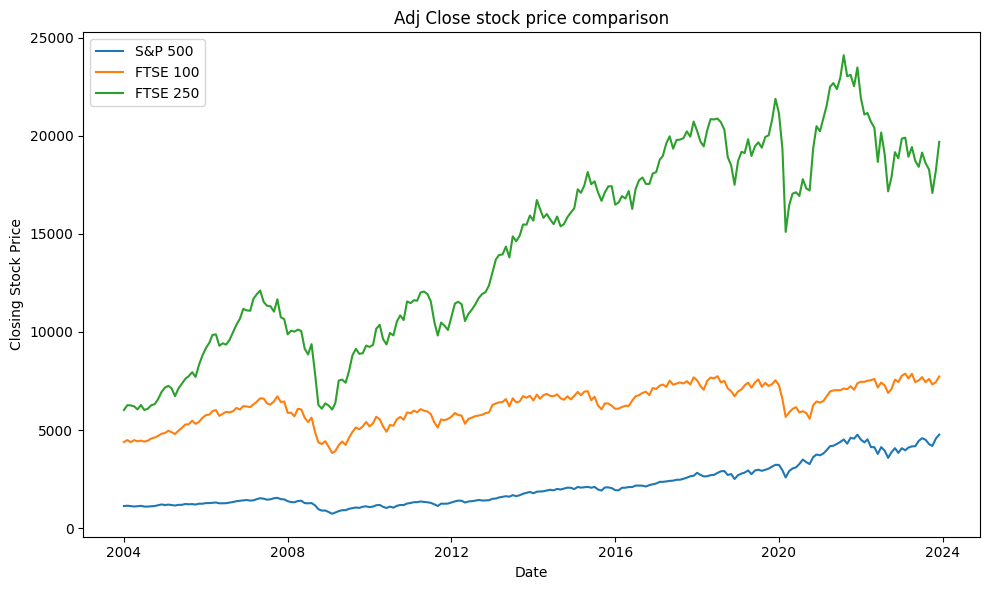

In [29]:
exclusions = ['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG']
company_chart(interval, exclusions)

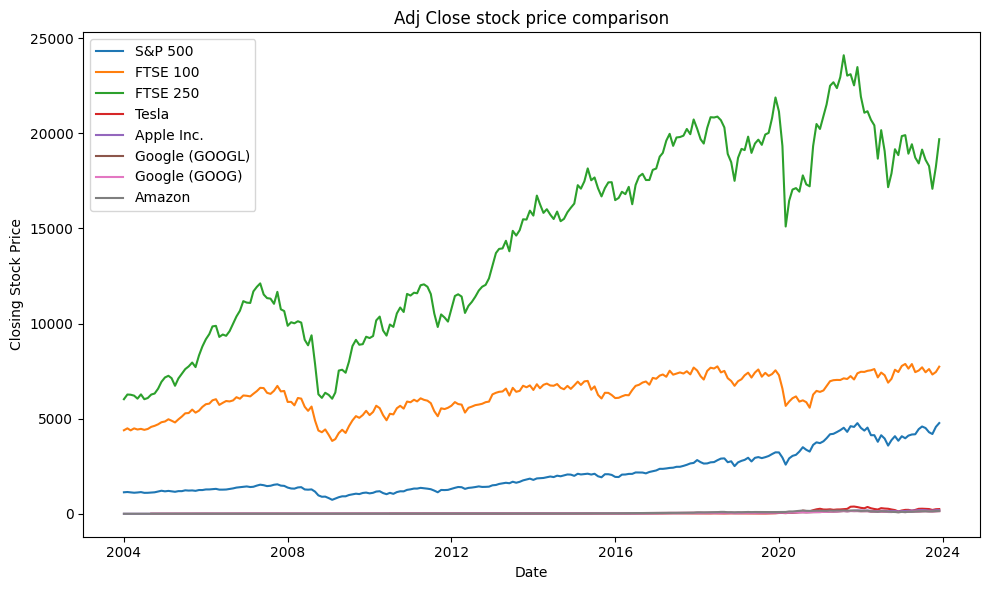

In [30]:
exclusions = ['no']
company_chart(interval, exclusions)

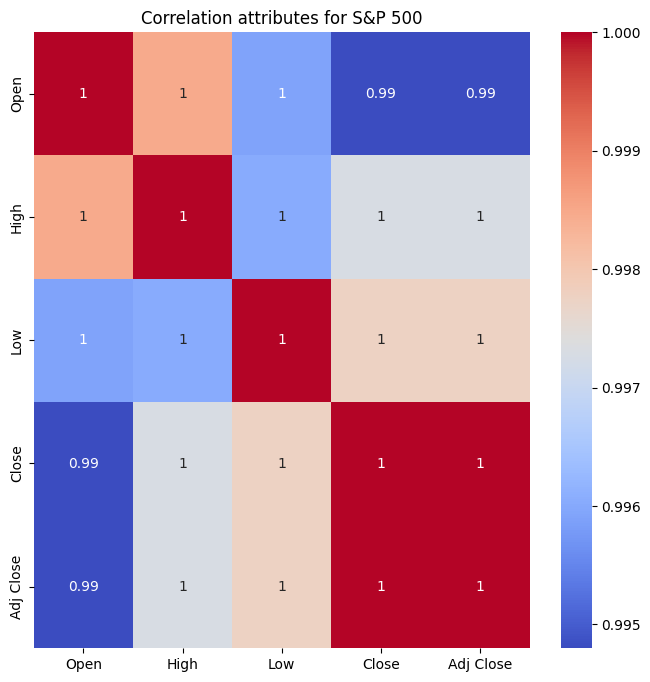

<Figure size 640x480 with 0 Axes>

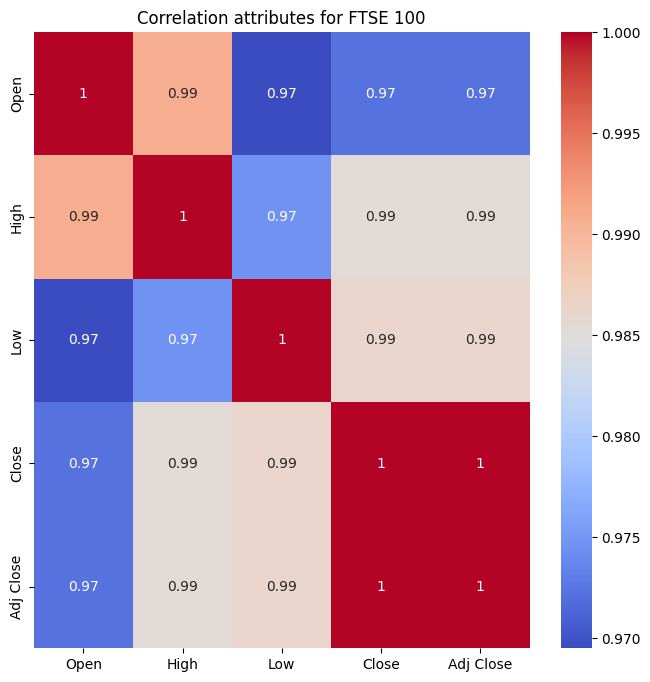

<Figure size 640x480 with 0 Axes>

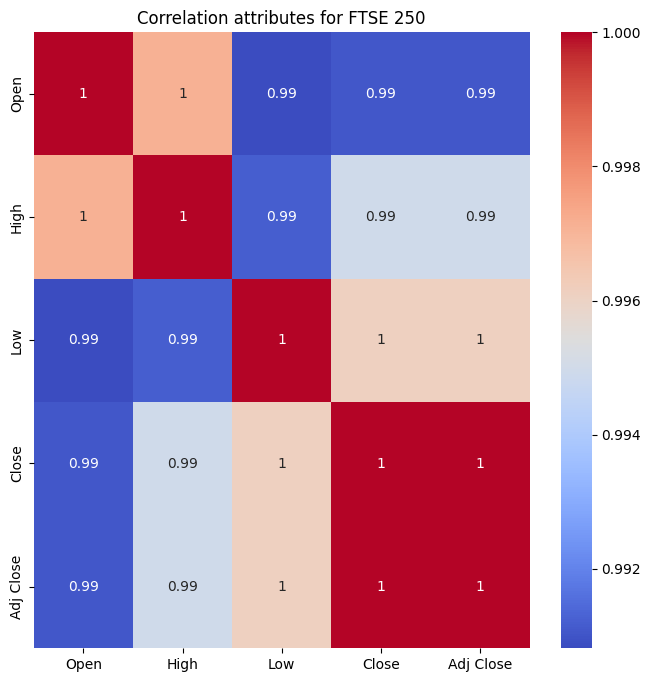

<Figure size 640x480 with 0 Axes>

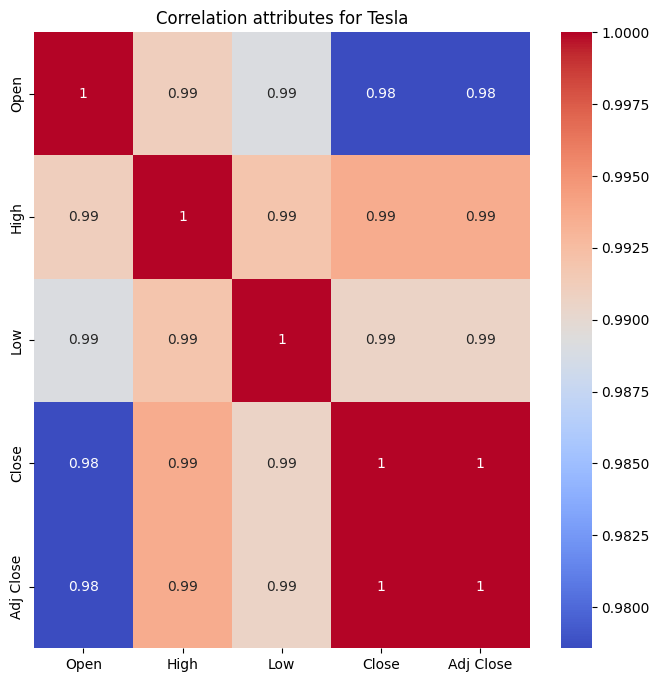

<Figure size 640x480 with 0 Axes>

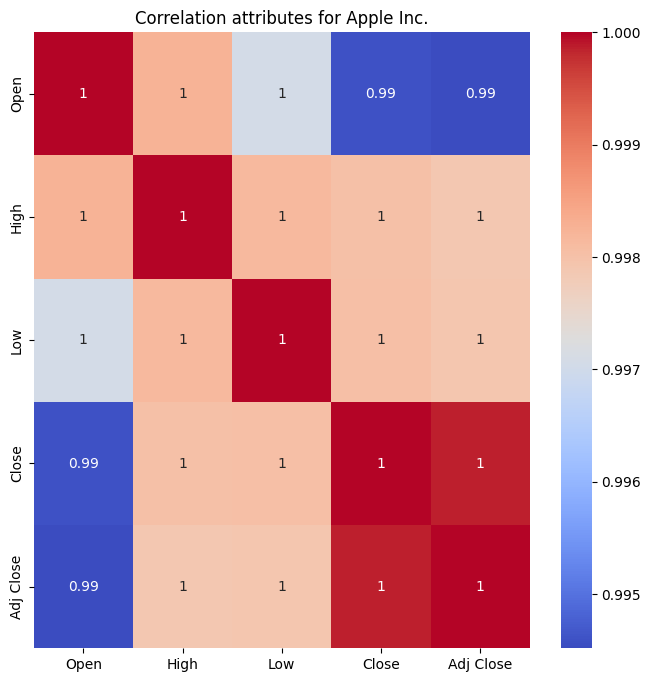

<Figure size 640x480 with 0 Axes>

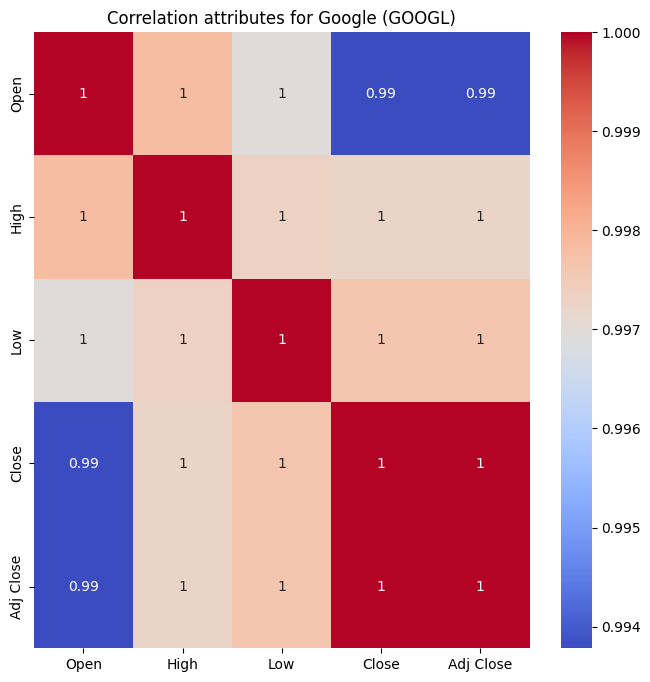

<Figure size 640x480 with 0 Axes>

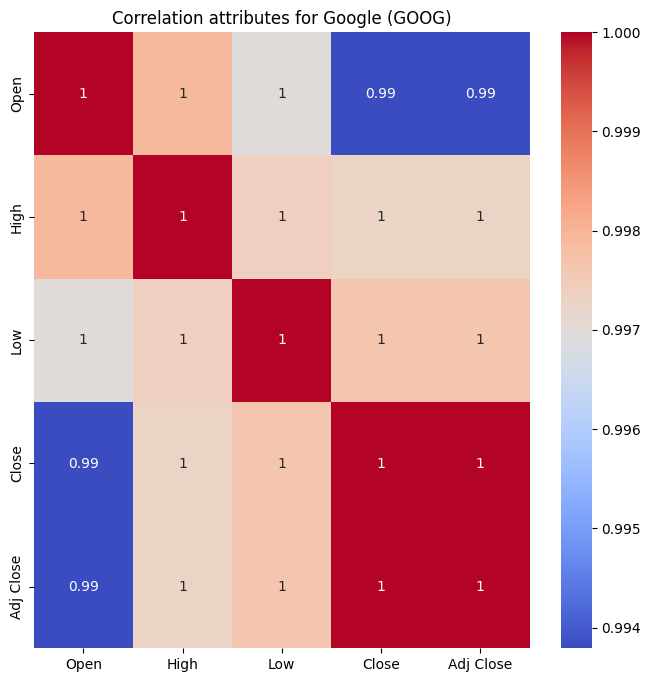

<Figure size 640x480 with 0 Axes>

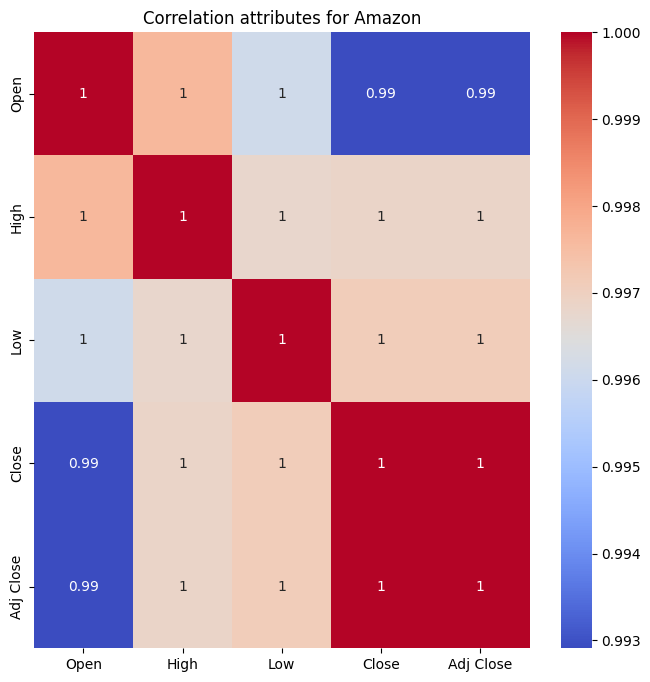

<Figure size 640x480 with 0 Axes>

In [31]:
heatmap(interval)